<a href="https://colab.research.google.com/github/ninjapastmaster/metodosnumericos/blob/master/METODO_DE_INTERPOLACION_EN_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

METODO DE INTERPOLACION EN PYTHON

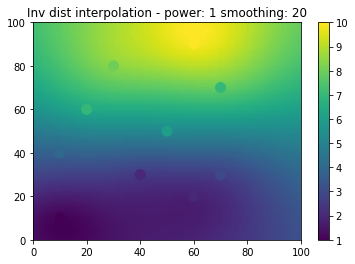

In [13]:
from math import pow  
from math import sqrt  
import numpy as np  
import matplotlib.pyplot as plt  

def pointValue(x,y,power,smoothing,xv,yv,values):  
       nominator=0  
       denominator=0  
       for i in range(0,len(values)):  
           dist = sqrt((x-xv[i])*(x-xv[i])+(y-yv[i])*(y-yv[i])+smoothing*smoothing);  
           
#Si el punto está realmente cerca de uno de los puntos de datos, devuelva el valor del punto de datos para evitar singularidades
           if(dist<0.0000000001):  
               return values[i]  
           nominator=nominator+(values[i]/pow(dist,power))  
           denominator=denominator+(1/pow(dist,power))  
       #Devuelve NODATA si el denominador es cero  
       if denominator > 0:  
           value = nominator/denominator  
       else:  
           value = -9999  
       return value  

def invDist(xv,yv,values,xsize=100,ysize=100,power=2,smoothing=0):  
       valuesGrid = np.zeros((ysize,xsize))  
       for x in range(0,xsize):  
           for y in range(0,ysize):  
               valuesGrid[y][x] = pointValue(x,y,power,smoothing,xv,yv,values)  
       return valuesGrid  


if __name__ == "__main__":  
       power=1  
       smoothing=20  

       #Crea algunos datos, con cada coodinado y los valores almacenados en listas separadas
       xv = [10,60,40,70,10,50,20,70,30,60]  
       yv = [10,20,30,30,40,50,60,70,80,90]  
       values = [1,2,2,3,4,6,7,7,8,10]  

       #Crear la cuadrícula de salida
       ti = np.linspace(0, 100, 100)  
       XI, YI = np.meshgrid(ti, ti)  

       #creando la función de interpolación y rellenando el valor de la matriz de salida 
       ZI = invDist(xv,yv,values,100,100,power,smoothing)  


       #Trazando el resultado 
       (0.0, 100.0)  
       plt.subplot(1, 1, 1)  
       plt.pcolor(XI, YI, ZI)  
       plt.scatter(xv, yv, 100, values)  
       plt.title('Inv dist interpolation - power: ' + str(power) + ' smoothing: ' + str(smoothing))  
       plt.xlim(0, 100)  
       plt.ylim(0, 100)  
       plt.colorbar()  

       plt.show() 